# Spline interpolacion
  

In [1]:
import numpy as np
import matplotlib.pylab as plt
from numpy.linalg import solve
%matplotlib inline
#REF: Adaptado de  https://github.com/rrgalvan

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$,$(2,6)$

In [2]:
x0, x1, x2, x3 = -1, 0, 1, 2
_x = np.array([x0, x1, x2, x3])
y0, y1, y2, y3 =  5, 3, 3, 6
_y = np.array([y0, y1, y2, y3])

interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$,$(2,6)$

Para calcular los splines cúbicos debemos resolver el sistema de ecuaciones que define los coeficientes de los polinomios cúbicos en los subintervalos $[-1,0]$ , $[0,1]$ y $[1,2]$. Empleando las condiciones del metodo de spline, y definiendo los polinomios para garantizar la continuidad en cada unos de los puntos, tenemos que:

Sean:
  * $s_0(x) = a_0 + b_0 (x-x_0) + c_0 (x-x_0)^2 + d_0 (x-x_0)^3$,
  * $s_1(x) = a_1 + b_1 (x-x_1) + c_1 (x-x_1)^2 + d_1 (x-x_1)^3$,
  * $s_2(x) = a_2 + b_2 (x-x_2) + c_2 (x-x_2)^2 + d_2 (x-x_2)^3$,



es decir:
  * $s_0(x) = a_0 + b_0 (x+1) + c_0 (x+1)^2 + d_0 (x+1)^3$,
  * $s_1(x) = a_1 + b_1x + c_1 x^2 + d_1 x^3$.
  * $s_2(x) = a_2 + b_2 (x-1) + c_2 (x-1)^2 + d_2 (x-1)^3$.

Entonces
  * $s_0'(x) =  b_0 + 2 c_0 (x+1) + 3 d_0 (x+1)^2$,
  * $s_0''(x) = 2 c_0 + 6 d_0 (x+1)$,
  * $s_1'(x) =  b_1 + 2 c_1 x + 3 d_1 x^2$,
  * $s_1''(x) = 2 c_1 + 6 d_1 x$.
  * $s_2'(x) =  b_2 + 2 c_2 (x-1) + 3 d_2 (x-1)^2$,
  * $s_2''(x) = 2 c_2 + 6 d_2 (x-1)$.

Tenemos 12 incógnitas, $a_i$, $b_i$, $c_i$, $d_i$ con $i=0,1,2$. Las ecuaciones son:

  * Interpolación (y continuidad ):

    * $s_0(-1) = 5$, es decir, $a_0=5$.
    * $s_0(0)  = 3$, es decir, $a_0+b_0+c_0+d_0=3$.
    * $s_1(0) = 3$, es decir, $a_1=3$.
    * $s_1(1)  = 3$, es decir, $a_1+b_1+c_1+d_1=3$.
    * $s_2(1) = 3$, es decir $a_2 = 3$ #
    * $s_2(2) = 6$, es decir $a_2+b_2+c_2+d_2=6$#
    
  * Derivabilidad:

    * $s_0'(0) = s_1'(0)$, es decir, $b_0+2c_0+3d_0 = b_1$.
    * $s_0''(0) = s_1''(0)$, es decir, $2c_0+6d_0 = 2c_1$.
    * $s_1'(1) = s_2'(1)$, es decir, $b_1+2c_1+3d_1 = b_2$.
    * $s_1''(1) = s_2''(1)$, es decir, $2c_1+6d_1 = 2c_2$.

  * Condiciones naturales en los extremos, $-1$ y $2$:

    * $s_0''(-1) = 0$, es decir, $2c_0=0$.
    * $s_2''(2) = 0$, es decir $2c_2-6d_2=0$.


Realiza un sistema de ecuaciones, teniendo en cuenta las variables conocidas que se deducen de las ecuaciones

In [3]:
a0 = 5
a1 = 3
a2 = 3
c0 = 0

llegando a un sistema de cinco ecuaciones con ocho incógnitas ($b_0$, $d_0$, $b_1$, $c_1$, $d_1,b_2,c_2,d_2$):

 * $b_0+d_0=3-a_0-c_0=-2$, |
 * $b_1+c_1+d_1=3-a_1=0$, |
 * $b_2+c_2+d_2=6-a_2=3 $#
 * $b_0+3d_0 - b_1 = -2c_0 = 0$, |
 * $6d_0 - 2c_1 = -2c_0=0$ |
 * $2c_2-6d_2 = 0$ #
 * $2c_1+6d_1-6d_2=2c_2-6d_2 = 0$ #
 * $b_1+2c_1+3d_1+c_2+d_2=b_2+c_2+d_2= 3$ #


La matriz y el segundo miembro asociados son:

In [4]:
A = np.array([
	[ 1, 1, 0, 0, 0, 0, 0, 0],
	[ 0, 0, 1, 1, 1, 0, 0, 0],
	[ 0, 0, 0, 0, 0, 1, 1, 1],
	[ 1, 3, -1, 0, 0, 0, 0, 0],
	[ 0, 6, 0, -2, 0, 0, 0, 0],
	[ 0, 0, 0, 0, 0, 0, 2, -6],
	[ 0, 0, 0, 2, 6, 0, 0, -6],
	[ 0, 0, 1, 2, 3, 0, 1, 1]])
b = np.array([-2, 0, 3, 0,0,0,0,3])

Ahora podemos resolver este sistema usando la función `solve()` (incluida en el modulo "linalg" del paquete *numpy*):

In [5]:
sol = solve(A,b)

# Definimos la solución como variables b0, d0, b1, c1 y d1
b0, d0, b1, c1, d1, b2, c2, d2= sol

# Y mostramos los resultados
print ("a0, b0, c0, d0 = %f, %f, %f, %f" % (a0, b0, c0, d0))
print ("a1, b1, c1, d1 = %f, %f, %f, %f" % (a1, b1, c1, d1))
print ("a1, b1, c1, d1 = %f, %f, %f, %f" % (a2, b2, c2, d2))

a0, b0, c0, d0 = 5.000000, -2.391304, 0.000000, 0.391304
a1, b1, c1, d1 = 3.000000, -1.217391, 1.173913, 0.043478
a1, b1, c1, d1 = 3.000000, 1.260870, 1.304348, 0.434783


Para dibujar la gráfica, lo más fácil es definir los polinomios $s_0$ y $s_1$ $s_2$ y representarlos gráficamente.

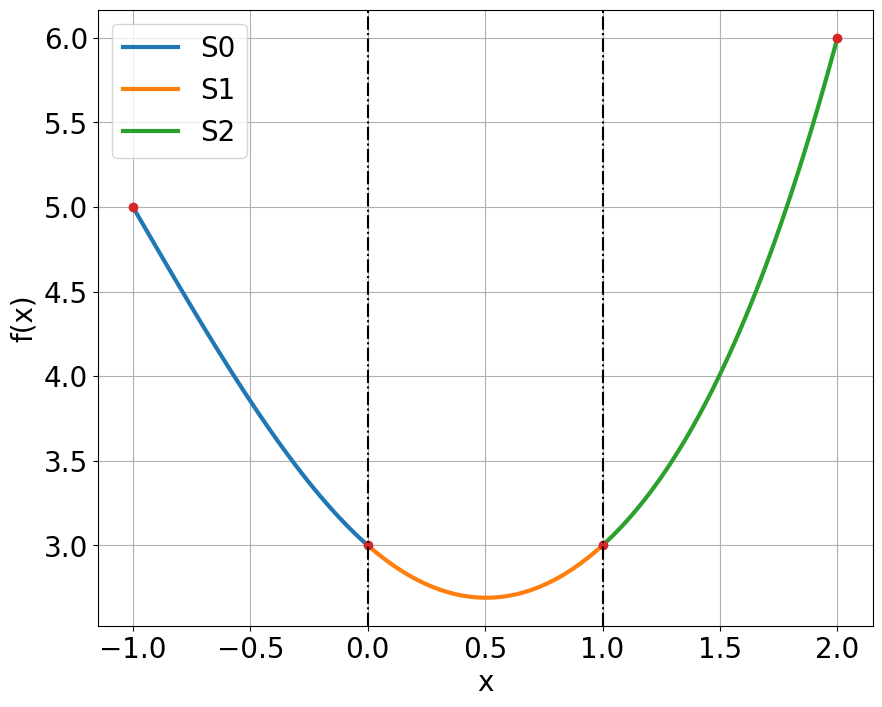

In [8]:
def s0(x):
    return a0 + b0*(x+1) + c0*(x+1)**2 + d0*(x+1)**3
def s1(x):
    return a1 + b1*x + c1*x**2 + d1*x**3
def s2(x):
    return a2 + b2*(x-1) + c2 *(x-1)**2 + d2*(x-1)**3

xx0 = np.linspace(-1,0)
xx1 = np.linspace(0,1)
xx2 = np.linspace(1,2)
plt.figure(figsize=(10, 8))
plt.plot(xx0, s0(xx0), lw=3, label = "S0")
plt.plot(xx1, s1(xx1), lw=3, label = "S1")
plt.plot(xx2, s2(xx2), lw=3, label = "S2")
plt.plot(_x, _y, 'o')
plt.axvline(x = _x[1] , color = "k", ls="-.")
plt.axvline(x = _x[2],color = "k", ls="-.")
plt.ylabel("f(x)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = "upper left", fontsize= 20)
plt.grid()
plt.show()